In [3]:
import numpy as np
np.random.seed(7)

In [4]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.utils import np_utils
from keras.datasets import mnist

Using TensorFlow backend.


In [5]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print (X_train.shape)

(60000, 28, 28)


In [6]:
X_train = X_train.reshape(X_train.shape[0], 784)
X_test = X_test.reshape(X_test.shape[0], 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255 #normalize 0-1
X_test /= 255
print(X_train.shape)

(60000, 784)


In [7]:
print (y_train.shape)

(60000,)


In [8]:
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [9]:
print (Y_train.shape)

(60000, 10)


In [40]:
model = Sequential()
model.add(Dense(784, activation = 'relu',input_shape=(784,)))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(10, activation='softmax'))

In [41]:
model.compile(loss='categorical_crossentropy',
              optimizer='adagrad',
              metrics=['accuracy'])

In [42]:
info = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=10, batch_size=32, verbose = 1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 37s 616us/step - loss: 0.1850 - acc: 0.9451 - val_loss: 0.1039 - val_acc: 0.9689
Epoch 2/10
60000/60000 [==============================] - 35s 583us/step - loss: 0.0798 - acc: 0.9771 - val_loss: 0.0804 - val_acc: 0.9750
Epoch 3/10
60000/60000 [==============================] - 35s 576us/step - loss: 0.0549 - acc: 0.9847 - val_loss: 0.0671 - val_acc: 0.9791
Epoch 4/10
60000/60000 [==============================] - 37s 610us/step - loss: 0.0408 - acc: 0.9883 - val_loss: 0.0654 - val_acc: 0.9793
Epoch 5/10
60000/60000 [==============================] - 33s 544us/step - loss: 0.0310 - acc: 0.9916 - val_loss: 0.0605 - val_acc: 0.9799
Epoch 6/10
60000/60000 [==============================] - 36s 606us/step - loss: 0.0242 - acc: 0.9944 - val_loss: 0.0576 - val_acc: 0.9824
Epoch 7/10
60000/60000 [==============================] - 31s 515us/step - loss: 0.0194 - acc: 0.9959 - val_loss: 0.

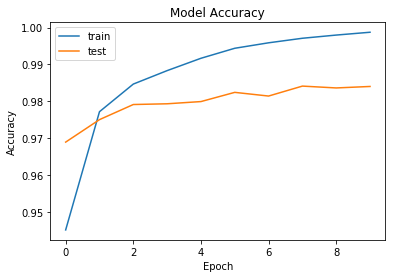

In [44]:
#print(info.history.keys())
import matplotlib.pyplot as plt
plt.plot(info.history['acc'])
plt.plot(info.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

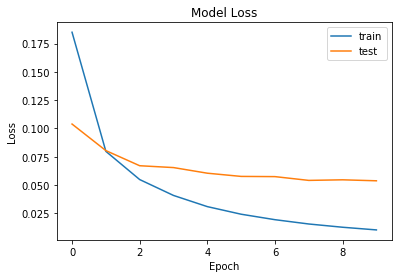

In [46]:
plt.plot(info.history['loss'])
plt.plot(info.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [43]:
score = model.evaluate(X_test, Y_test, verbose=1)
print ("Test Accuracy: ",score[1]*100)

10000/10000 [==============================] - 1s 102us/step
Test Accuracy:  98.4


In [30]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 784)               615440    
_________________________________________________________________
dense_2 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650       
Total params: 666,330
Trainable params: 666,330
Non-trainable params: 0
_________________________________________________________________
